## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")

sns.set()
import os 
os.getcwd()

'C:\\Users\\Admin'

## Reading the file

In [127]:
tr = pd.read_csv(r"G:\Imarticus Data\Data analytics\Python Data\trainRF.csv")

In [3]:
tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Cleaning

**Checking nulls & Duplicates**

In [4]:
tr.isnull().sum()[tr.isnull().sum() > 0]

Series([], dtype: int64)

- As there are no nulls we can proceed with futher analysis

In [5]:
tr.select_dtypes(include = 'object').columns

Index([], dtype='object')

- There are no columns with object data type.

In [6]:
tr.duplicated().sum()

0

- The dataset does not contain duplicate samples.

In [16]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## EDA for analysing the data

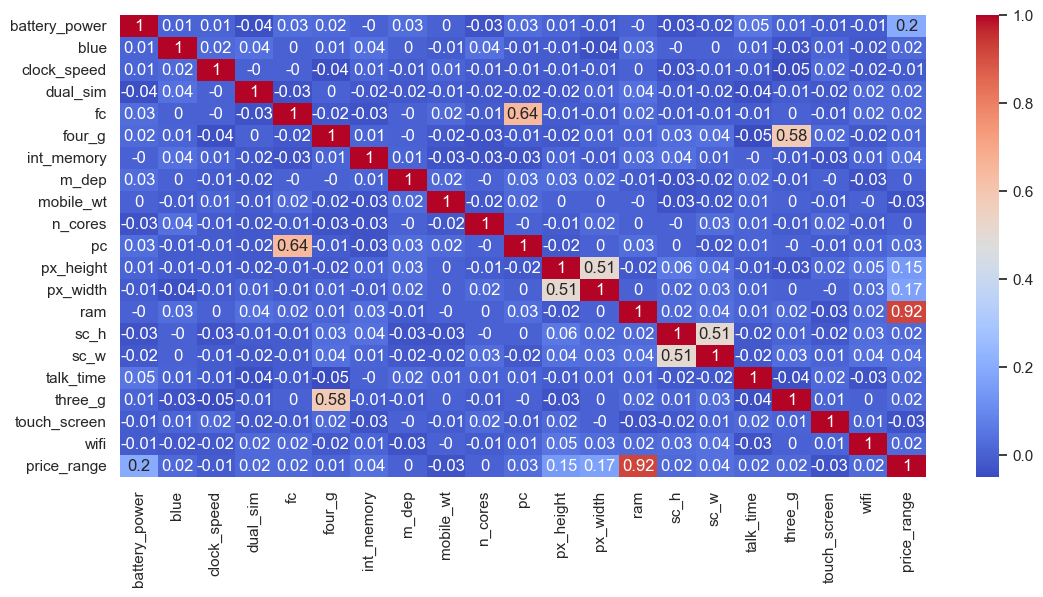

In [10]:
plt.figure(figsize= (13,6))
sns.heatmap(tr.corr().round(2) , annot = True , cmap= 'coolwarm' )
plt.show()

- We can see a high correlation of 0.92 between price_range and ram
- Another feature affecting price_range after ram is battery_power, followed by px_height and px_width according to the correlation.

**Here we'll see how Ram is affecting price range -**

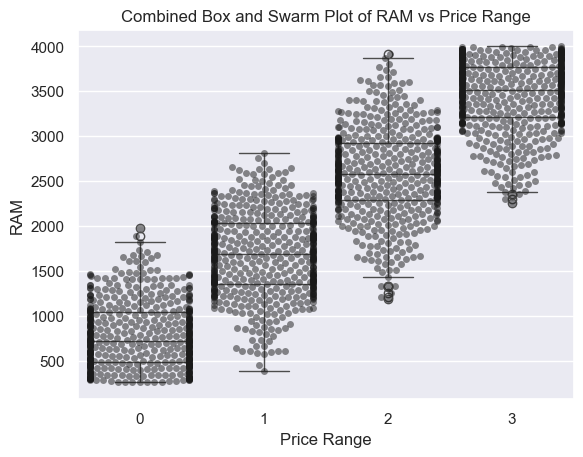

In [8]:
sns.boxplot(x='price_range', y='ram', data=tr, showcaps= True, boxprops= {'facecolor':'None'})
sns.swarmplot(x='price_range', y='ram', data=tr, color='k', alpha=0.5)
plt.title('Combined Box and Swarm Plot of RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

- This clearly depicts that higher price ranges are associated with higher RAM.
- This trend suggests that RAM is a significant feature for differentiating between price ranges.

**Battery power vs Price range -**

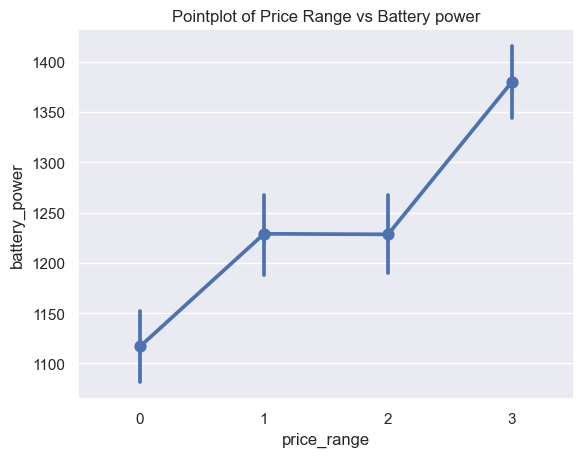

In [9]:
sns.pointplot(x = 'price_range', y = 'battery_power', data = tr)
plt.title('Pointplot of Price Range vs Battery power');

- Looking at this point plot we can say that for price range of 1 & 2(middle range) we can expect almost similar range of battery power.
- The range of battery power increases after price range of 0 and 3 and is stable between 1 & 2

**Boxplot: int_memory vs price_range -**

<Axes: xlabel='price_range', ylabel='int_memory'>

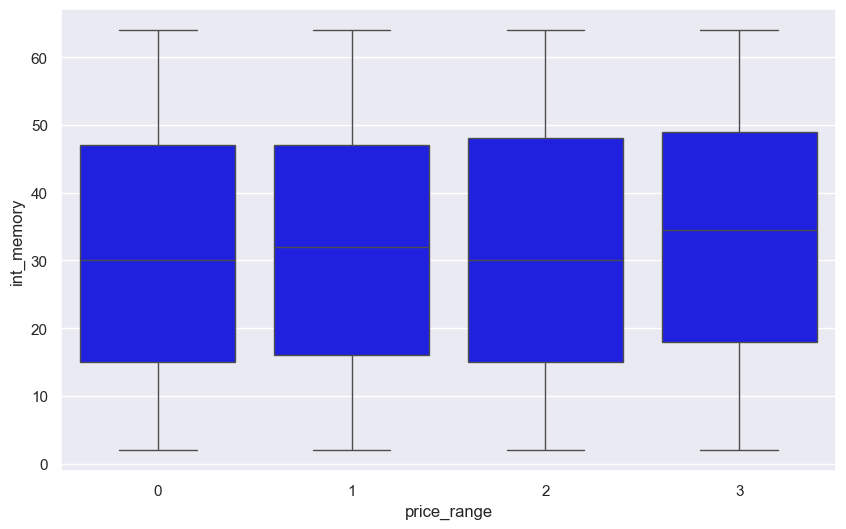

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(x = ='price_range', y = 'int_memory' ,data = tr , color = "blue")

- The internal memory does not vary significantly across different price ranges, except for a slight increase in the median in the highest price range 3.- 
This might suggest that internal memory is not a major differentiating factor among the phones in different price ranges, although higher price ranges might have a slightly higher internal memory on average.

**Boxplot: px_width vs price_range -**

<Axes: xlabel='price_range', ylabel='px_width'>

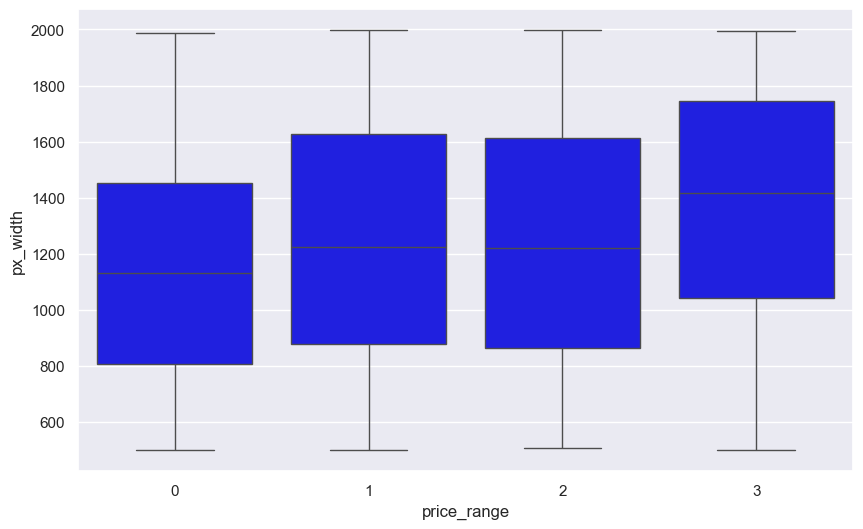

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'px_width',x ='price_range' ,data = tr , color = "blue")

- There is a noticeable trend where higher price ranges tend to have higher median pixel widths.
- This trend suggests that pixel width could be an important feature for differentiating between price ranges.

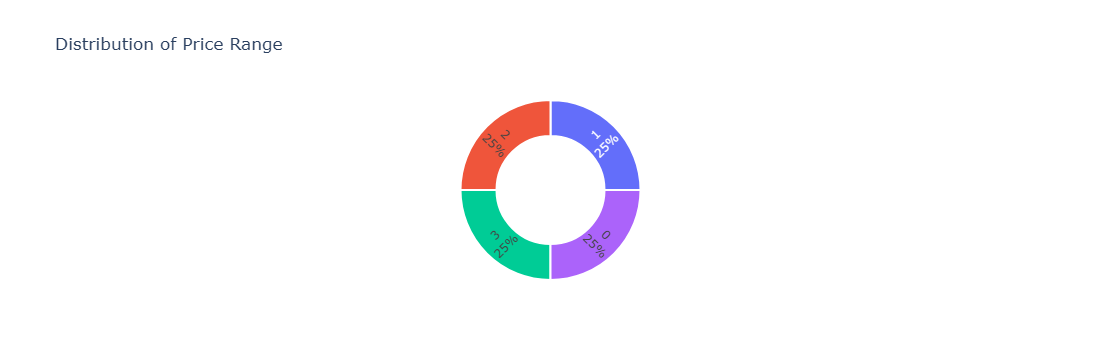

In [82]:
import plotly.graph_objects as go
value_counts = tr['price_range'].value_counts()
labels = value_counts.index.tolist()
values = value_counts.values.tolist()

fig = go.Figure(go.Pie(
    labels=labels,
    values=values,
    hole=0.6,  
    textposition='inside',
    textinfo='percent+label',
    marker=dict(line=dict(color='white', width=2))))


fig.update_layout(title={'text': "Distribution of Price Range"}, showlegend=False)
fig.show()

- There seems to be no class imbalance in this dataset as each class contains approximately 25% of the data.

## Splitting Data

In [128]:
from sklearn.model_selection import train_test_split
train_tr , test_tr = train_test_split(tr , test_size= .25 , random_state= 123)

In [129]:
tr_train_x = train_tr.drop(['price_range'] , axis = 1)
tr_train_y = train_tr.price_range

tr_test_x = test_tr.drop(['price_range'] , axis = 1)
tr_test_y = test_tr.price_range

## Logistic Regression -

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(tr_train_x , tr_train_y)

LogisticRegression()

In [68]:
pred_test = logreg.predict(tr_test_x)
pred_train = logreg.predict(tr_train_x)

In [69]:
from sklearn.metrics import *

In [70]:
tab = confusion_matrix(tr_test_y , pred_test)
tab

array([[118,   1,   0,   0],
       [  4, 121,   3,   0],
       [  0,   3, 129,   5],
       [  0,   0,   7, 109]], dtype=int64)

 This suggests that the confusion matrix is fairly balanced, it is not significantly skewed.

In [71]:
train_acc_log = accuracy_score(tr_train_y , pred_train)
test_acc_log = accuracy_score(tr_test_y , pred_test)
print('Accuracy after feature selection -')
print(f"Training Accuracy : {train_acc_log}")
print(f"Testing Accuracy : {test_acc_log}")

Accuracy after feature selection -
Training Accuracy : 0.9626666666666667
Testing Accuracy : 0.954


In [73]:
precision_score(tr_test_y ,pred_test , average='macro')

0.9548527548970315

In [74]:
f1_score(tr_test_y , pred_test, average='macro')

0.9545958867039509

In [75]:
recall_score(tr_test_y ,pred_test , average='macro')

0.9545425376213285

In [76]:
print(classification_report(tr_test_y ,pred_test ))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.97      0.95      0.96       128
           2       0.93      0.94      0.93       137
           3       0.96      0.94      0.95       116

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



### **Feature Selection on Logistic Regression - Filter method**

In [62]:
X = tr.iloc[: , 0: -1]
Y = tr.price_range
corr_list = []
for i in X.columns:
    corr_list.append(X[i].corr(Y))

In [63]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = X.columns
feat_imp['Imp'] = corr_list
feat_imp = feat_imp[(feat_imp.Imp > .1) | (feat_imp.Imp < -.1)]
l1 = list(feat_imp.Features)
l1.append('price_range')
feat_imp

,Features,Imp
0,battery_power,0.200723
1,px_height,0.148858
2,px_width,0.165818
3,ram,0.917046


In [64]:
tr = tr.loc[: , l1]

- Model has shown a significant improvement after feature selection

## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 2) # Setting max_depth = 2 because accuracy on train was 1. The model was overfitted.
dt.fit(tr_train_x , tr_train_y)

DecisionTreeClassifier(max_depth=2)

In [107]:
pred_test_dt = dt.predict(tr_test_x)
pred_train_dt = dt.predict(tr_train_x)

In [108]:
train_acc_dt = accuracy_score(tr_train_y , pred_train_dt)
test_acc_dt = accuracy_score(tr_test_y , pred_test_dt)
print(f"Training Accuracy: {train_acc_dt}")
print(f"Testing Accuracy : {test_acc_dt}")


Training Accuracy: 0.7666666666666667
Testing Accuracy : 0.742


In [95]:
tab_dt = confusion_matrix(tr_test_y , pred_test_dt)
tab_dt

array([[96, 23,  0,  0],
       [15, 98, 15,  0],
       [ 0, 30, 84, 23],
       [ 0,  0, 23, 93]], dtype=int64)

In [96]:
print(classification_report(tr_test_y , pred_test_dt))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       119
           1       0.65      0.77      0.70       128
           2       0.69      0.61      0.65       137
           3       0.80      0.80      0.80       116

    accuracy                           0.74       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.74      0.74       500



### Cross-validation on Decision Tree

In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [24]:
x = tr.drop(['price_range'] ,axis = 1)
y = tr.price_range

In [25]:
clf = DecisionTreeClassifier()

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, x, y, cv=kf)

In [27]:
print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", np.mean(cv_scores))

print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.825  0.8275 0.8375 0.8375 0.82  ]
Mean CV Score: 0.8295
Standard Deviation of CV Scores: 0.006964194138592088


    Based on the cross-validation results and the classification report,the decision tree model appears to be a good fit for the data. 
- The mean cross-validation score of 0.82 indicates that the model generalizes well to unseen data.
- The low standard deviation across cross-validation scores suggests that the model's performance is consistent and reliable.
- The classification report shows a balanced performance with reasonable precision, recall, and F1-scores across different classes.

### Adaboost with Decision Tree

In [109]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt)

In [110]:
abc.fit(tr_train_x, tr_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2))

In [111]:
pred_abc = abc.predict(tr_test_x)
pred_abc_t = abc.predict(tr_train_x)

In [112]:
from sklearn import *

In [113]:
train_accuracy = accuracy_score(tr_train_y, pred_abc_t)
test_accuracy = accuracy_score(tr_test_y, pred_abc)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy : {test_accuracy}")


Training Accuracy: 0.8093333333333333
Testing Accuracy : 0.826


In [114]:
print(classification_report(tr_test_y , pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       119
           1       0.82      0.81      0.82       128
           2       0.73      0.88      0.80       137
           3       0.93      0.71      0.80       116

    accuracy                           0.83       500
   macro avg       0.84      0.82      0.83       500
weighted avg       0.84      0.83      0.83       500



The application of AdaBoost to the decision tree model resulted in an overall improvement in the performance of the model. 
The accuracy increased from 74% to 82%, indicating a significantly better overall classification capability.
- There is a significant improvement in the Precision of class 2 and class 3.
- Adaboost helped the model, particularly by improving the balance between precision and recall across the different classes.



## Random Forest

In [22]:
search_grid = { 'n_estimators': [50, 100, 150, 200], 
    'max_depth': np.arange(5, 20, 5),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6] }

In [23]:
rfc = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

rfc_optimised = GridSearchCV(rfc, search_grid, cv=5, scoring='accuracy')


In [24]:
rfc_optimised.fit(tr_train_x, tr_train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=None,
                                              random_state=0),
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [25]:
best_params = rfc_optimised.best_params_
best_score = rfc_optimised.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8926666666666667


In [26]:
best_rfc = rfc_optimised.best_estimator_

In [27]:
pred_test_rfc = rfc_optimised.predict(tr_test_x)
pred_train_rfc = rfc_optimised.predict(tr_train_x)

In [28]:
print(classification_report(tr_test_y , pred_test_rfc))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       119
           1       0.85      0.84      0.85       128
           2       0.85      0.82      0.84       137
           3       0.90      0.89      0.89       116

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [39]:
train_acc_rfc = accuracy_score(tr_train_y , pred_train_rfc)
test_acc_rfc = accuracy_score(tr_test_y , pred_test_rfc)
print(f"Training Accuracy: {train_acc_rfc}")
print(f"Testing Accuracy : {test_acc_rfc}")

Training Accuracy: 0.9786666666666667
Testing Accuracy : 0.872


## SVM

In [130]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(tr_train_x , tr_train_y)

SVC()

In [131]:
pred_test_svc = svc.predict(tr_test_x)
pred_train_svc = svc.predict(tr_train_x)

In [132]:
tab_svc= confusion_matrix(tr_test_y , pred_test_svc)
tab_svc

array([[118,   1,   0,   0],
       [  4, 122,   2,   0],
       [  0,   7, 122,   8],
       [  0,   0,   3, 113]], dtype=int64)

In [133]:
train_acc_svc = accuracy_score(tr_train_y , pred_train_svc)
test_acc_svc = accuracy_score(tr_test_y , pred_test_svc)
print(f"Training Accuracy: {train_acc_svc}")
print(f"Testing Accuracy : {test_acc_svc}")

Training Accuracy: 0.952
Testing Accuracy : 0.95


In [36]:
print(classification_report(tr_test_y , pred_test_svc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.94      0.95      0.95       128
           2       0.96      0.89      0.92       137
           3       0.93      0.97      0.95       116

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



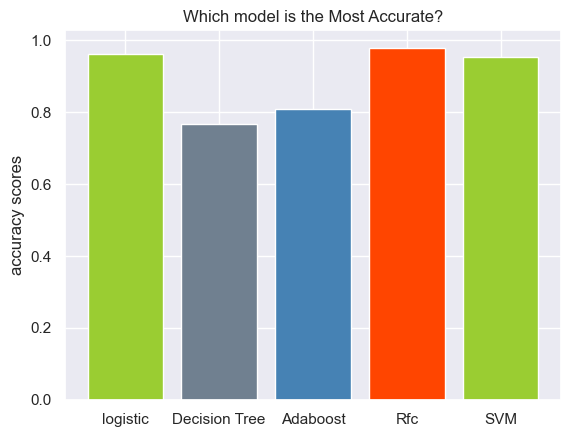

In [157]:
models = ['logistic', 'Decision Tree', 'Adaboost', 'Rfc', 'SVM']
acc_scores = [train_acc_log, train_acc_dt, train_accuracy, train_acc_rfc, train_acc_svc]

plt.bar(models, acc_scores, color=['yellowgreen', 'slategrey', 'steelblue', 'orangered', 'yellowgreen'])
plt.ylabel("accuracy scores")
plt.title("Which model is the Most Accurate?")
plt.show()

**Conclusion -**

This project evaluated five machine learning models for predicting mobile phone prices: 
Logistic Regression, Decision Tree, AdaBoost with Decision Tree, Random Forest and SVM. The models were compared based on their training and testing 
accuracies.

- **Decision Tree:** 76.7% training accuracy, 74.2% testing accuracy.
- **Random Forest:** 97.9% training accuracy, 87.2% testing accuracy.
- **AdaBoost:** 80.9% training accuracy, 82.6% testing accuracy.
- **Logistic Regression:** 96.3% training accuracy, 95.4% testing accuracy.4
- **SVM:** 95.2% training accuracy, 95.0% testing accuracy
   
Based on the results, both Logistic Regression and SVM have emerged as top-performing models, each achieving an impressive 95% accuracy on the test data. These models exhibit balanced performance metrics, with precision, recall, and F1-scores all hovering around 0.95. Such consistency underscores their robustness in predicting mobile phone prices accurately.
Considering its simplicity and outstanding performance, Logistic Regression stands out as the recommended model for deployment. Its ease of implementation and interpretability make it a practical choice for real-world applications. Nevertheless, the SVM model also remains a strong contender, given its competitive performance.